<a href="https://colab.research.google.com/github/nayankr77/eda-projects/blob/main/Hotel_Booking_Analysis_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

# Project Name - Hotel Booking Anaylsis#

NAME : Kamalnayan kumar

Contribution - Individual

**Github link#**

https://github.com/nayankr77

Import libraries#

In [ ]:
# Importing all import python libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Load the Data#

In [ ]:
#Mounting a drive
from google.colab import drive                     
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# loading csv File
file_path = '/content/drive/MyDrive/Hotel Bookings.csv'
df=pd.read_csv(file_path)

Description of Data Frame#

In [ ]:
# Taking a look to data
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
# Creating a copy of dataframe
Hotel_df= df.copy()

In [ ]:
Hotel_df.shape

(119390, 32)

In [ ]:
# Show no. of rows of duplicate rows duplicate rows
Hotel_df[Hotel_df.duplicated()].shape

(31994, 32)

In [ ]:
Hotel_df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [ ]:
Hotel_df['arrival_date_year'].unique()

array([2015, 2016, 2017])

In [ ]:
Hotel_df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [ ]:
Hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
#missing values in Columns
Hotel_df.isnull().sum().sort_values(ascending = False)[:6]

company               112593
agent                  16340
country                  488
children                   4
reserved_room_type         0
assigned_room_type         0
dtype: int64

## Data Cleaning
Following steps are perfomed as a part of data cleaning:
1. Remove duplicate rows 
2. Handling missing values


In [ ]:
# How many Duplicate Rows are there
Hotel_df[Hotel_df.duplicated()].shape

(31994, 32)

In [ ]:
# Drop Duplicate Rows
Hotel_df.drop_duplicates(inplace = True)

In [ ]:
# DataFrame after Drop Duplicate Rows
Hotel_df.shape

(87396, 32)

In [ ]:
# Handling missing values.
Hotel_df1 = Hotel_df.dropna(axis=1)


In [ ]:
# Columns having missing values.
Hotel_df1.isnull().sum().sort_values(ascending = False)[:6]

hotel                          0
is_canceled                    0
reservation_status             0
total_of_special_requests      0
required_car_parking_spaces    0
adr                            0
dtype: int64

In [ ]:
Hotel_df1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


## Q1. From which country most of the guests are coming ?


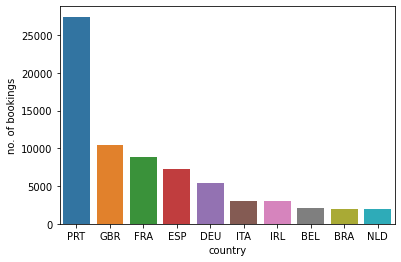

In [ ]:
grp_by_country = Hotel_df.groupby('country')
d2 = pd.DataFrame(grp_by_country.size()).rename(columns = {0:'no. of bookings'}).sort_values('no. of bookings', ascending = False)
d2 = d2[:10]
sns.barplot(x = d2.index, y = d2['no. of bookings'])
plt.show()

#### Inference
Most of the customers come from Portugal, Great Britain, France and Spain.


## Q2. Which hotel seems to make more revenue?


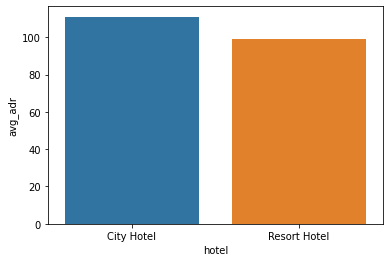

In [ ]:
grp_by_Hotel = Hotel_df.groupby('hotel')
d3 = grp_by_Hotel['adr'].agg(np.mean).reset_index().rename(columns = {'adr':'avg_adr'})
sns.barplot(x = d3['hotel'], y = d3['avg_adr'])
plt.show()

#### Inference
Avg adr of Resort hotel is slightly lower than that of City hotel. Hence, City hotel seems to be making slightly more revenue.

## Q3. What are the month wise bookings of each hotel? Which month is the busiest month?


In [ ]:
ordered_months = ["January", "February", "March", "April", "May", "June", "July", "August",
                  "September", "October", "November", "December"]
room_prices_monthly["arrival_date_month"] = pd.Categorical(room_prices_monthly["arrival_date_month"], categories=ordered_months, ordered=True)

NameError: ignored

11257
August       11257
July         10057
May           8355
April         7908
June          7765
March         7513
October       6934
September     6690
February      6098
December      5131
November      4995
January       4693
Name: arrival_date_month, dtype: int64


Text(0, 0.5, 'Number of bookings')

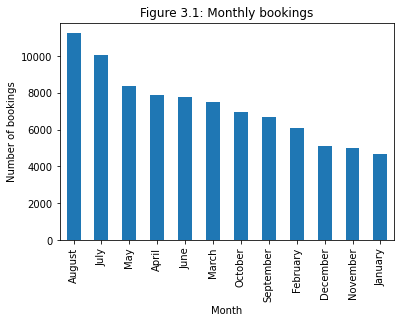

In [ ]:
monthly_bookings = Hotel_df1['arrival_date_month'].value_counts()
max_monthly_bookings = Hotel_df1['arrival_date_month'].value_counts().max()

print(max_monthly_bookings)
print(monthly_bookings)
monthly_bookings.plot(kind = 'bar')
plt.title('Figure 3.1: Monthly bookings')
plt.xlabel('Month')
plt.ylabel('Number of bookings')


#### Inference
August is the busisest month more number of customers

## Q4. How many customers are asking for car parking space?



In [ ]:
customers_asking_for_car_parking = Hotel_df[Hotel_df['required_car_parking_spaces'] == 1]
# print(customers_asking_for_car_parking)
car_parking_hotel_wise = customers_asking_for_car_parking['hotel'].value_counts()
print(car_parking_hotel_wise)
# plt.rcParams['figure.figsize'] = (10,5)
car_parking_hotel_wise.plot(kind = 'bar')
plt.title('Customers asking for car parking space')
plt.xlabel('Market segment')
plt.ylabel('Number of customers')

#### Inference
More customers from resort hotels are asking for carparking space.

## Q5.Which hotel has the maximum booking in week night?


In [ ]:
week_bookings = Hotel_df[Hotel_df['stays_in_week_nights']>=1]
week_bookings_per_hotel = week_bookings[['hotel']].value_counts()
week_bookings_per_hotel

In [ ]:
week_bookings_per_hotel.plot(kind = 'pie')
plt.title('Week bookings in each hotel')

#### Inference
City hotels have more bookings in week nights

## Q6.Which Hotel has the maximum booking in weekend night?

In [ ]:
weekend_bookings = Hotel_df[Hotel_df['stays_in_weekend_nights']>=1]
weekend_bookings_per_hotel = weekend_bookings[['hotel']].value_counts()
weekend_bookings_per_hotel

In [ ]:
weekend_bookings_per_hotel.plot(kind = 'pie')
plt.title('Weekend bookings in each hotel')

#### Inference
City hotels have more bookings in weekend nights.

## Q7. What is the most preferred meal type?


In [ ]:
meal_types_count = Hotel_df['meal'].value_counts()
# preferred_meal_type = meal_types_count.max()
# preferred_meal_type
print(meal_types_count)

In [ ]:
plt.plot(meal_types_count)
plt.title('Types of meal and count')
plt.xlabel('Meal Type')
plt.ylabel('Count')

#### Inference
The above figure shows different meal types and number of people opted for each meal. We can see that BB is the most preferred meal type. The number of people who selected BB is meal type is 67978

## Q8. What are the total  bookings and cancellations in each hotel type?

In [ ]:
confirmed_bookings = Hotel_df[Hotel_df['is_canceled']==0]
confirmed_bookings_per_hotel = confirmed_bookings[['hotel']].value_counts()
print(confirmed_bookings_per_hotel)
confirmed_bookings_per_hotel.plot(kind = 'pie')
plt.title('Confirmed bookings in each hotel')

#### Inference
City Hotels have more number of confirmed and are receiving more number of guests than Resort Hotels.

In [ ]:
cancelled_bookings = Hotel_df[Hotel_df['is_canceled']==1]
cancelled_bookings_per_hotel = cancelled_bookings[['hotel']].value_counts()
print(cancelled_bookings_per_hotel)
cancelled_bookings_per_hotel.plot(kind = 'pie')
plt.title('Cancelled bookings in each hotel')

#### Inference
More customers are cancelling their bookings in the city hotels as compared to resort hotels.

In [ ]:
num_df1 = Hotel_df[['lead_time','previous_cancellations','previous_bookings_not_canceled','booking_changes','days_in_waiting_list','adr','required_car_parking_spaces']]

## Q9. Which hotel has longer waiting time?



#### Inference
City hotels have a longer waiting time.

Q10 which hotel seems to make more revenue?

Q11 Which hotel has higher lead time?

Q12 What is preferred stay in each hotel?